In [1]:
# Part A
from sklearn.datasets import load_breast_cancer
#print(load_breast_cancer())
breast_cancer = load_breast_cancer()

In [2]:
# Part B
print("Name of Type of Tumor:")
for eachTarget in breast_cancer.target_names:
  print(eachTarget)
print()
print("List of Breast Cancer Feature:")
for featureName in breast_cancer.feature_names:
  print(featureName)

Name of Type of Tumor:
malignant
benign

List of Breast Cancer Feature:
mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension


In [3]:
# Part C 
# Split the half for train and the remaining to test
from sklearn.model_selection import train_test_split
x = breast_cancer.data
y = breast_cancer.target

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.5)


In [4]:
# Part G
# Generation Decision Tree from X_Train,YTrain and predict Y_pred from test
from sklearn import tree
from sklearn.metrics import accuracy_score
DTclf = tree.DecisionTreeClassifier(max_depth=2)
DTclf.fit(X_train,Y_train)
Y_predicted = DTclf.predict(X_test)
accuracy = accuracy_score(Y_test,Y_predicted) * 100
print(accuracy)

92.63157894736842


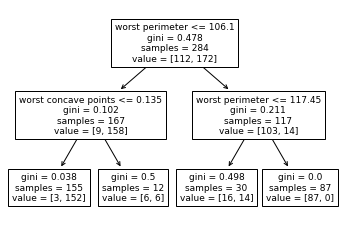

In [5]:
# Part H
# Visualize the tree using sklearn.tree.plot tree. Each node of trees should include feature name.
import matplotlib.pyplot as plt
tree.plot_tree(DTclf,feature_names=breast_cancer.feature_names,fontsize=9)
plt.show()

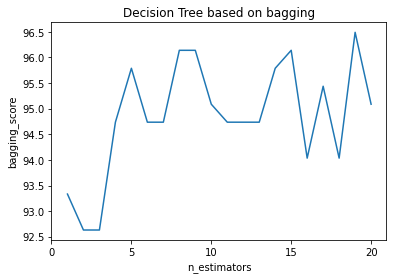

In [6]:
# Part I graph base on bagging
import numpy as np
from sklearn.ensemble import BaggingClassifier

#Number of Datapoints aka Estimator
dataPoints = 20
BaggingAccuracy = []
tickStep = 5.0

for value in range(1,dataPoints + 1):
  bClassifier = BaggingClassifier(DTclf,n_estimators=value)
  bClassifier.fit(X_train,Y_train)
  Y_predicted = bClassifier.predict(X_test)
  accuracy = accuracy_score(Y_test,Y_predicted) * 100
  #print(accuracy)
  BaggingAccuracy.append(accuracy)

#print(len(BaggingAccuracy))
#print(accuracy)

plt.title("Decision Tree based on bagging")
plt.plot(list(range(1,dataPoints + 1)),BaggingAccuracy)
plt.xticks(np.arange(0,dataPoints + 1,tickStep))
plt.xlabel("n_estimators")
plt.ylabel("bagging_score")
plt.show()


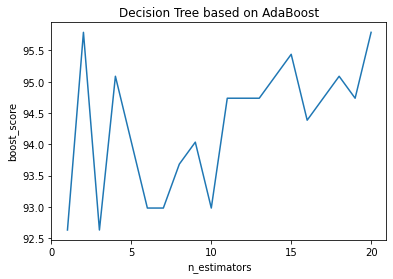

In [7]:
# Part J graph base on Ada Boost
from sklearn.ensemble import AdaBoostClassifier

AdaAccuracy = []

for value in range(1,dataPoints + 1):
  AdaBoost = AdaBoostClassifier(DTclf,n_estimators=value)
  AdaBoost.fit(X_train,Y_train)
  Y_predicted = AdaBoost.predict(X_test)
  accuracy = accuracy_score(Y_test,Y_predicted) * 100
  #print(accuracy)
  AdaAccuracy.append(accuracy)

plt.title("Decision Tree based on AdaBoost")
plt.plot(list(range(1,dataPoints +1)),AdaAccuracy)
plt.xticks(np.arange(0,dataPoints + 1,tickStep))
plt.xlabel("n_estimators")
plt.ylabel("boost_score")
plt.show()

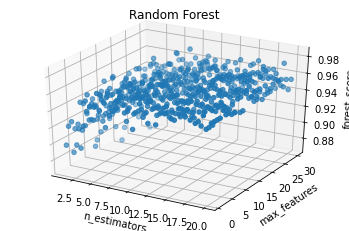

In [8]:
# Park K 3D Graph base on random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

Forest_Score = []
n_estimators = []
max_features_per_estimator = []
max_features = len(breast_cancer.feature_names)

for eachEstimator in range(1,dataPoints + 1):
  for value in range(1,max_features + 1):
    n_estimators.append(eachEstimator)
    max_features_per_estimator.append(value)
    RFModel = RandomForestClassifier(max_features=value,n_estimators=eachEstimator)
    RFModel.fit(X_train,Y_train)
    Y_predicted = RFModel.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_predicted)
    Forest_Score.append(accuracy)
  

# X - n_estimators
# Y - max_features
# Z - forest_score
ax = plt.axes(projection = '3d')
ax.scatter(n_estimators,max_features_per_estimator,Forest_Score)
ax.set_title("Random Forest")
ax.set_xlabel("n_estimators")
ax.set_ylabel("max_features")
ax.set_zlabel("forest_score")
plt.show()

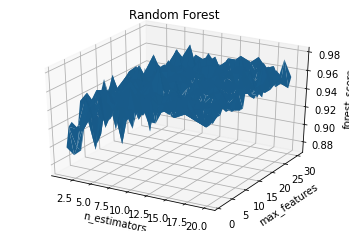

In [22]:
ax = plt.axes(projection = '3d')
ax.plot_trisurf(n_estimators,max_features_per_estimator,Forest_Score,linewidth = 0.2,antialiased = True)
ax.set_title("Random Forest")
ax.set_xlabel("n_estimators")
ax.set_ylabel("max_features")
ax.set_zlabel("forest_score")
plt.show()